In [1]:
pip install feedparser

  Using cached feedparser-6.0.8-py3-none-any.whl (81 kB)
  Using cached sgmllib3k-1.0.0-py3-none-any.whl



In [2]:
import feedparser

In [36]:
rss_url = "https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money"

In [37]:
newsFeed = feedparser.parse(rss_url)
newsFeed

{'bozo': True,
 'entries': [{'title': '德州艾爾帕索傳槍響  已知1死5傷',
   'title_detail': {'type': 'text/plain',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money',
    'value': '德州艾爾帕索傳槍響  已知1死5傷'},
   'links': [{'rel': 'alternate',
     'type': 'text/html',
     'href': 'https://money.udn.com/money/story/10511/5594868'}],
   'link': 'https://money.udn.com/money/story/10511/5594868',
   'published': 'Mon, 12 Jul 2021 06:54:23 +0800',
   'published_parsed': time.struct_time(tm_year=2021, tm_mon=7, tm_mday=11, tm_hour=22, tm_min=54, tm_sec=23, tm_wday=6, tm_yday=192, tm_isdst=0),
   'summary': '德州艾爾帕索郡警方表示，今天凌晨德州艾爾帕索郡（El Paso）以東的郊區沙漠地帶爆發槍擊，一名21歲的男子被擊斃，另有...',
   'summary_detail': {'type': 'text/html',
    'language': None,
    'base': 'https://money.udn.com/rssfeed/news/1001/5588/10511?ch=money',
    'value': '德州艾爾帕索郡警方表示，今天凌晨德州艾爾帕索郡（El Paso）以東的郊區沙漠地帶爆發槍擊，一名21歲的男子被擊斃，另有...'},
   'id': 'https://money.udn.com/money/story/10511/5594868',
   'guidislink': Fa

In [35]:
i = 1
for e in newsFeed['entries']:
    title = e['title']
    link_url = e['links'][0]['href']
    print("%s, %s, %s"%(i, title, link_url))
    i = i + 1

In [6]:
import requests
from lxml import etree
from io import StringIO
import jieba
import pandas as pd
import time
import random

In [7]:
jieba.set_dictionary('Word_Dictionary/dict.txt.big')

In [8]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36"
my_headers = {
    'User-Agent': user_agent,
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-Language": "zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",
    "accept-encoding": "gzip, deflate, br",
    "Connection": "keep-alive",
    "cache-control": "no-cache",
    "Accept-Charset": "UTF8,utf-8;q=0.7,*;q=0.7"
}

In [9]:
each_article_text_list = []
for e in newsFeed['entries']:
    url = e['links'][0]['href']
    print(url)
    r = requests.get(url, headers = my_headers)
    if r.status_code == 200:
        parse_tree = etree.parse(StringIO(r.text), etree.HTMLParser())
        article_elements = parse_tree.xpath('//*[@id="article_body"]//p')
        for a_part in article_elements:
            if type(a_part.text) is str:
                each_article_text_list.append(a_part.text.strip())
        sleep_time = random.randint(3,10)
        print("sleep time: %s sec"%(sleep_time))
        time.sleep(sleep_time)
    all_article_text = ''.join(each_article_text_list)
all_article_text

https://money.udn.com/money/story/10511/5594868
sleep time: 8 sec
https://money.udn.com/money/story/10511/5592075
sleep time: 3 sec
https://money.udn.com/money/story/10511/5591672
sleep time: 3 sec
https://money.udn.com/money/story/10511/5591479
sleep time: 4 sec
https://money.udn.com/money/story/10511/5591120
sleep time: 6 sec
https://money.udn.com/money/story/10511/5590983
sleep time: 7 sec
https://money.udn.com/money/story/10511/5590837
sleep time: 6 sec
https://money.udn.com/money/story/10511/5590833
sleep time: 10 sec
https://money.udn.com/money/story/10511/5590832
sleep time: 3 sec
https://money.udn.com/money/story/10511/5590650
sleep time: 8 sec
https://money.udn.com/money/story/10511/5590645
sleep time: 5 sec
https://money.udn.com/money/story/10511/5590640
sleep time: 9 sec
https://money.udn.com/money/story/10511/5590407
sleep time: 7 sec
https://money.udn.com/money/story/10511/5589609
sleep time: 10 sec
https://money.udn.com/money/story/10511/5589497
sleep time: 4 sec
https://

'德州艾爾帕索郡警方表示，今天凌晨德州艾爾帕索郡（El Paso）以東的郊區沙漠地帶爆發槍擊，一名21歲的男子被擊斃，另有5人受傷。美聯社報導，艾爾帕索郡警長發表聲明說，員警接獲報案趕抵現場，並發現5人身受重傷，但並未具體說明傷勢的細節，也沒有說明死者與傷者的身分。「艾爾帕索時報」（The El Paso Times）報導，歹徒做案動機警方仍在調查中。中國副外長樂玉成昨天接受陸媒專訪時稱，美國衰落的不是實力而是霸權，且思想衰落更危險。他還說，美國的霸權心態和冷戰思維，秀肌肉、舞大棒嚇唬人，「中國人是嚇不倒的」。7月9日是美國前國務卿季辛吉（Henry Kissinger）秘訪中國50週年，樂玉成當天在北京接受陸媒「觀察者網」專訪時，作上述表示。對於美國現任國務卿布林肯（Antony Blinken）說，美國要「從實力地位出發」同中國打交道，樂玉成稱，「這番話骨子裡就是霸權心態和冷戰思維，無非就是秀肌肉、舞大棒嚇唬人」。他又說，「中國人是嚇不倒的，歷史上一窮二白、小米加步槍的時候我們也沒有怕過誰，現在更沒理由怕什麼『實力地位』。」樂玉成並宣稱，美國衰落的不是實力而是霸權。他說，就實力而言，美國仍是全球位居第一的大國、強國。「但實力再強，國霸必衰，霸權不得人心。」他表示，「對一個大國來說，思想的衰落比實力的衰落更危險。在21世紀多極化、全球化時代，不能還想著從冷戰工具箱裡翻找工具，天天琢磨著怎麼遏制他國，拉『小圈子』，搞集團對抗，按叢林法則行事。」樂玉成還說，美國的外交思維是「散發著黴味的陳腐思想」。他甚至批評美國總統拜登（Joe Biden）提出的「重建更好世界」（Build Back Better World，B3W），在中國「一帶一路」建設7年多後才提出，不僅抗衡不了「一帶一路」，反而進一步證明「一帶一路」是正確之路、未來之路。他並反擊美國等西方國家對中國人權的指責。樂玉成宣稱，民主、人權不是標語口號，必須保障人們擁有工作、住房、溫飽、受教育、醫療、養老等基本人權。樂玉成接著宣稱，中共領導14億中國人民擺脫千年貧困，過上幸福生活，就是最大的人權、最好的人權。「可以說中國共產黨在人權問題上不僅無可指責，而且應該給其頒金牌、授勳章。」對於美國要求對中國展開2019冠狀病毒疾病（COVID-19）溯源調查，樂玉成則說，中方已兩次邀請世界衛生組織專家赴中進行溯源研究合作。

In [10]:
seg_words_list = jieba.lcut(all_article_text)
seg_words_list

Building prefix dict from C:\Users\Tibame_T14\Desktop\課程\Text Mining\Word_Dictionary\dict.txt.big ...
Dumping model to file cache C:\Users\TIBAME~1\AppData\Local\Temp\jieba.u2eb2346e927214b69fa48678a01079f5.cache
Loading model cost 1.273 seconds.
Prefix dict has been built successfully.


['德州',
 '艾爾帕索',
 '郡',
 '警方',
 '表示',
 '，',
 '今天',
 '凌晨',
 '德州',
 '艾爾帕索',
 '郡',
 '（',
 'El',
 ' ',
 'Paso',
 '）',
 '以東',
 '的',
 '郊區',
 '沙漠',
 '地帶',
 '爆發',
 '槍擊',
 '，',
 '一名',
 '21',
 '歲',
 '的',
 '男子',
 '被',
 '擊斃',
 '，',
 '另有',
 '5',
 '人',
 '受傷',
 '。',
 '美聯社',
 '報導',
 '，',
 '艾爾帕索',
 '郡',
 '警長',
 '發表',
 '聲',
 '明說',
 '，',
 '員警',
 '接獲',
 '報案',
 '趕抵',
 '現場',
 '，',
 '並',
 '發現',
 '5',
 '人',
 '身受',
 '重傷',
 '，',
 '但',
 '並未',
 '具體',
 '說明',
 '傷勢',
 '的',
 '細節',
 '，',
 '也',
 '沒有',
 '說明',
 '死者',
 '與',
 '傷者',
 '的',
 '身分',
 '。',
 '「',
 '艾爾帕索',
 '時報',
 '」',
 '（',
 'The',
 ' ',
 'El',
 ' ',
 'Paso',
 ' ',
 'Times',
 '）',
 '報導',
 '，',
 '歹徒',
 '做案',
 '動機',
 '警方',
 '仍',
 '在',
 '調查',
 '中',
 '。',
 '中國',
 '副外長',
 '樂',
 '玉成',
 '昨天',
 '接受',
 '陸媒',
 '專訪',
 '時稱',
 '，',
 '美國',
 '衰落',
 '的',
 '不是',
 '實力',
 '而是',
 '霸權',
 '，',
 '且',
 '思想',
 '衰落',
 '更',
 '危險',
 '。',
 '他',
 '還說',
 '，',
 '美國',
 '的',
 '霸權',
 '心態',
 '和',
 '冷戰',
 '思維',
 '，',
 '秀',
 '肌肉',
 '、',
 '舞',
 '大棒',
 '嚇唬人',
 '，',
 '「',
 '中國',
 '人',
 '是',
 '嚇不倒',
 '的',


In [27]:
with open(file='Word_Dictionary/stop_words.txt', mode='r', encoding='utf-8') as file:
    stop_words = file.read().split('\n')
stop_words

['the',
 'of',
 'is',
 'and',
 'to',
 'in',
 'that',
 'we',
 'for',
 'an',
 'are',
 'by',
 'be',
 'as',
 'on',
 'with',
 'can',
 'if',
 'from',
 'which',
 'you',
 'it',
 'this',
 'then',
 'at',
 'have',
 'all',
 'not',
 'one',
 'has',
 'or',
 'that',
 '的',
 '了',
 '和',
 '是',
 '就',
 '都',
 '而',
 '及',
 '與',
 '著',
 '或',
 '一個',
 '沒有',
 '我們',
 '你們',
 '妳們',
 '他們',
 '她們',
 '是否',
 '，',
 '「',
 '」',
 '。',
 '：',
 '！',
 '？',
 '／',
 '＼',
 '（',
 '）',
 '、',
 '\u3000',
 '『',
 '』',
 '-',
 '《',
 '》',
 ' ']

In [28]:
seg_stop_words_list = []
seg_words_list = jieba.lcut(all_article_text)
for term in seg_words_list:
    if term not in stop_words:
        seg_stop_words_list.append(term)
seg_stop_words_list

['德州',
 '艾爾帕索',
 '郡',
 '警方',
 '表示',
 '今天',
 '凌晨',
 '德州',
 '艾爾帕索',
 '郡',
 'El',
 'Paso',
 '以東',
 '郊區',
 '沙漠',
 '地帶',
 '爆發',
 '槍擊',
 '一名',
 '21',
 '歲',
 '男子',
 '被',
 '擊斃',
 '另有',
 '5',
 '人',
 '受傷',
 '美聯社',
 '報導',
 '艾爾帕索',
 '郡',
 '警長',
 '發表',
 '聲',
 '明說',
 '員警',
 '接獲',
 '報案',
 '趕抵',
 '現場',
 '並',
 '發現',
 '5',
 '人',
 '身受',
 '重傷',
 '但',
 '並未',
 '具體',
 '說明',
 '傷勢',
 '細節',
 '也',
 '說明',
 '死者',
 '傷者',
 '身分',
 '艾爾帕索',
 '時報',
 'The',
 'El',
 'Paso',
 'Times',
 '報導',
 '歹徒',
 '做案',
 '動機',
 '警方',
 '仍',
 '在',
 '調查',
 '中',
 '中國',
 '副外長',
 '樂',
 '玉成',
 '昨天',
 '接受',
 '陸媒',
 '專訪',
 '時稱',
 '美國',
 '衰落',
 '不是',
 '實力',
 '而是',
 '霸權',
 '且',
 '思想',
 '衰落',
 '更',
 '危險',
 '他',
 '還說',
 '美國',
 '霸權',
 '心態',
 '冷戰',
 '思維',
 '秀',
 '肌肉',
 '舞',
 '大棒',
 '嚇唬人',
 '中國',
 '人',
 '嚇不倒',
 '7',
 '月',
 '9',
 '日',
 '美國',
 '前',
 '國務卿',
 '季辛吉',
 'Henry',
 'Kissinger',
 '秘訪',
 '中國',
 '50',
 '週年',
 '樂',
 '玉成',
 '當天',
 '在',
 '北京',
 '接受',
 '陸媒',
 '觀察者',
 '網',
 '專訪',
 '時',
 '作',
 '上述',
 '表示',
 '對於',
 '美國',
 '現任',
 '國務卿',
 '布',
 '林肯',
 'Anto

In [16]:
pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print(matplotlib.matplotlib_fname())

C:\Users\Tibame_T14\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [18]:
seg_words = ' '.join(seg_words_list)

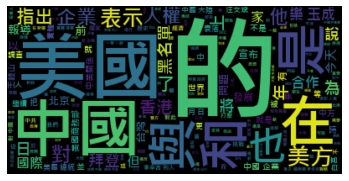

In [29]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/msjhbd.ttc').generate(seg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
from collections import Counter
seg_stop_counter = Counter(seg_stop_words_list)

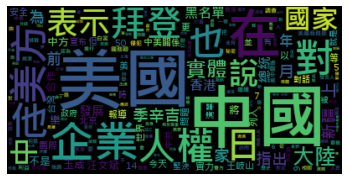

In [32]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/msjhbd.ttc').generate_from_frequencies(seg_stop_counter)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()